<a href="https://colab.research.google.com/github/eco-abhi/Pytorch/blob/main/Pytorch_Linear_Regression_(Moore's_Law).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
!wget https://github.com/lazyprogrammer/machine_learning_examples/blob/master/tf2.0/moore.csv

--2024-07-15 16:32:32--  https://github.com/lazyprogrammer/machine_learning_examples/blob/master/tf2.0/moore.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘moore.csv.1’

moore.csv.1             [  <=>               ] 172.94K   704KB/s    in 0.2s    

2024-07-15 16:32:33 (704 KB/s) - ‘moore.csv.1’ saved [177086]



In [39]:
df = pd.read_csv('moore.csv', header=None).values
X = df[:, 0].reshape(-1, 1)
y = df[:, 1].reshape(-1, 1)

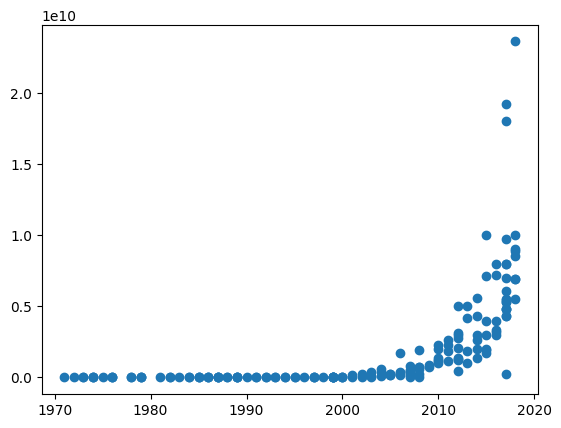

In [40]:
plt.scatter(X, y)

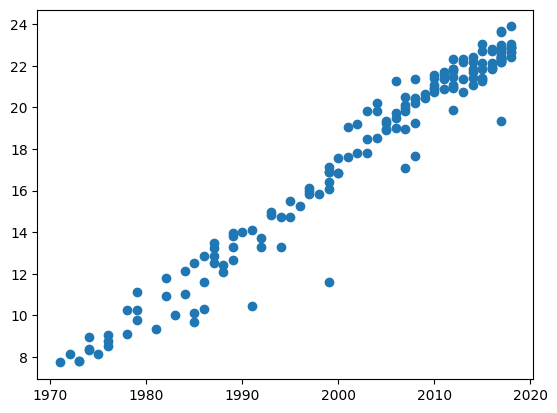

In [41]:
# Since we want a linear model, let's take the log
Y = np.log(y)
plt.scatter(X, Y)

In [42]:
# Scale and center the x and y axis

mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()

X = (X - mx) / sx
Y = (Y - my) / sy

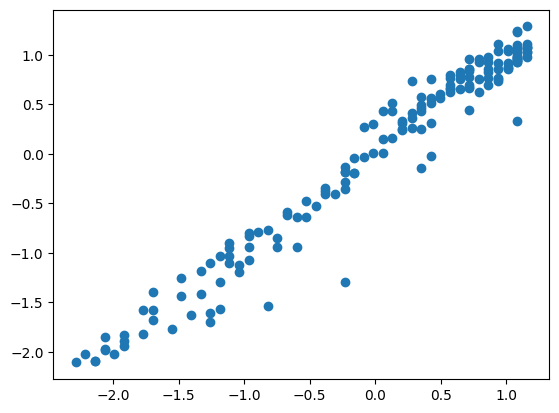

In [43]:
plt.scatter(X, Y)

In [44]:
# Cast to float32

X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [45]:
# Create the linear regression model

model = nn.Linear(1, 1)

In [46]:
# Loss and optimizer

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [47]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [48]:
type(inputs)

torch.Tensor

In [49]:
# Train the model

n_epochs = 100
losses = []

for it in range(n_epochs):
  # Zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record the loss
  losses.append(loss.item())

  # Backward pass and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 1.4792
Epoch 2/100, Loss: 1.4221
Epoch 3/100, Loss: 1.3289
Epoch 4/100, Loss: 1.2157
Epoch 5/100, Loss: 1.0945
Epoch 6/100, Loss: 0.9734
Epoch 7/100, Loss: 0.8577
Epoch 8/100, Loss: 0.7503
Epoch 9/100, Loss: 0.6529
Epoch 10/100, Loss: 0.5660
Epoch 11/100, Loss: 0.4894
Epoch 12/100, Loss: 0.4225
Epoch 13/100, Loss: 0.3645
Epoch 14/100, Loss: 0.3147
Epoch 15/100, Loss: 0.2719
Epoch 16/100, Loss: 0.2355
Epoch 17/100, Loss: 0.2045
Epoch 18/100, Loss: 0.1783
Epoch 19/100, Loss: 0.1560
Epoch 20/100, Loss: 0.1373
Epoch 21/100, Loss: 0.1214
Epoch 22/100, Loss: 0.1081
Epoch 23/100, Loss: 0.0969
Epoch 24/100, Loss: 0.0874
Epoch 25/100, Loss: 0.0795
Epoch 26/100, Loss: 0.0729
Epoch 27/100, Loss: 0.0673
Epoch 28/100, Loss: 0.0626
Epoch 29/100, Loss: 0.0587
Epoch 30/100, Loss: 0.0554
Epoch 31/100, Loss: 0.0527
Epoch 32/100, Loss: 0.0504
Epoch 33/100, Loss: 0.0484
Epoch 34/100, Loss: 0.0468
Epoch 35/100, Loss: 0.0454
Epoch 36/100, Loss: 0.0443
Epoch 37/100, Loss: 0.0434
Epoch 38/1

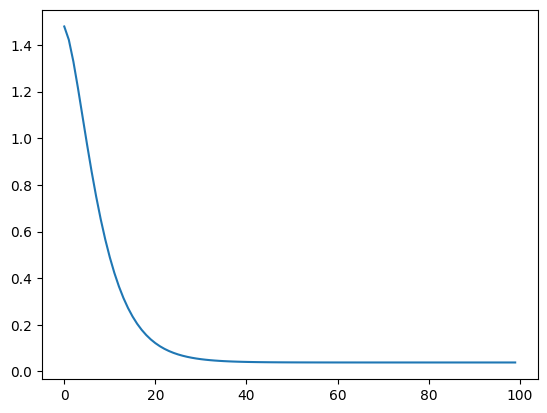

In [50]:
# Loss per iteration

plt.plot(losses)

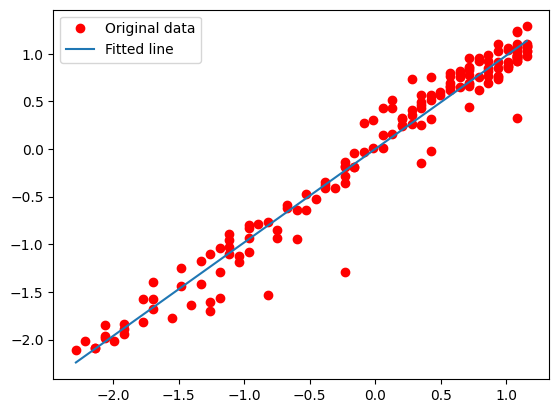

In [55]:
# Plot the graph

predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [53]:
# What does this mean?
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.98036337]] [0.00010894]


### Transforming back to original scale
#### Our original hypothesis is that the growth is exponential. This has the form:

> C = Co * r^t

In this equation, C is the transistor count, t is the year, Co is the original transistor count at year 0, and , is the rate of growth.


We made this equation linear by taking the log of both sides.

> log C = log Co + log r * t


Here, log C represents the variable that goes along the y-axis, and t represents the variable that goes along the x-axis.

In other words, under our hypothesized model, the log of transistor counts is linear with respect to time.
Let us rename the variables to a more familiar form:

> y = ax + log Co

Now y = log C represents the log of transistor counts and x = t represents time. a = log r is the slope
and log Co is the y-intercept.

### Our Model
#### We normalized the data as follows:

> y' = (yーmy) / Sy

> x' = (xーmx) / Sx


Here, mx represents the sample mean of the x data and sx represents the sample standard deviation of the x data, with analogous definitions for my and sy.

#### Our model looks like:
> y' = wx' + b

We can recover the original model by substituting x' and y' with corresponding expressions in terms of x and y.

> (y - my) / sy = w * (x - mx) / sx + b

After some algebraic manipulation (try it yourself, it's only high school math), we get:

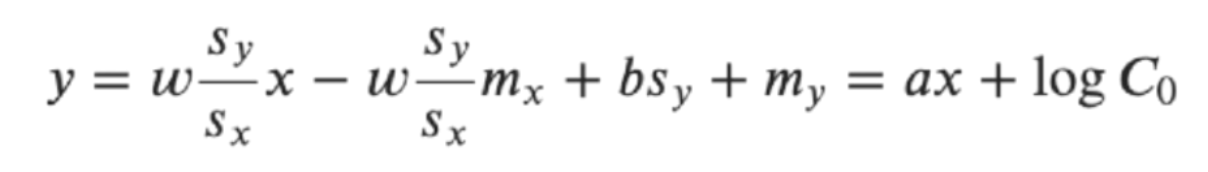

It is clear that the coefficient in front of x represents our original a, and the sum of all the other terms represents log Co.

We are onlv interested in the doubling time. so we have found that:

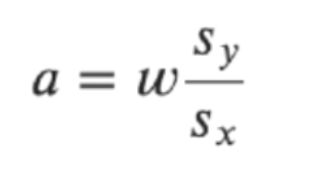

In [58]:
a = w[0, 0] * sy / sx
a

0.3416100949481034

## Exponential Growth Model

Our equation is currently linear. We still need to find the doubling time.

Our original model for exponential growth is:

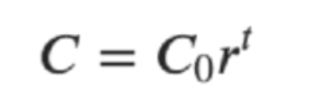

Where C is transistor the count and t is the year.

r is the rate of growth. For example, when t goes from 1 to 2, C increases by a factor of r. When t goes from 2 to 3, C increases by a factor of r again.

When we take the log of both sides, we get:

log C = log r * t + log Co

This is our linear equation:

y = ax + log Co

Where:

y = log C

a = log r

x = t

We are interested in r, because that's the rate of growth. Given our regression weights, we know that:

a = 0.341659983

so that:

r=e^0.341659983 = 1.40728

## To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for C to increase to 2C.

Let's call the original starting time t, to correspond with the initial transistor count C.

Let's call the end time t', to correspond with the final transistor count 2C.

#### Then we also have:

Combine this with our original equation:

We get (by dividing the 2 equations):

2C = Co * (r ^ t')

C = Co * (r ^ t)

2C / C = Co * (r ^ t') / Co * (r ^ t)



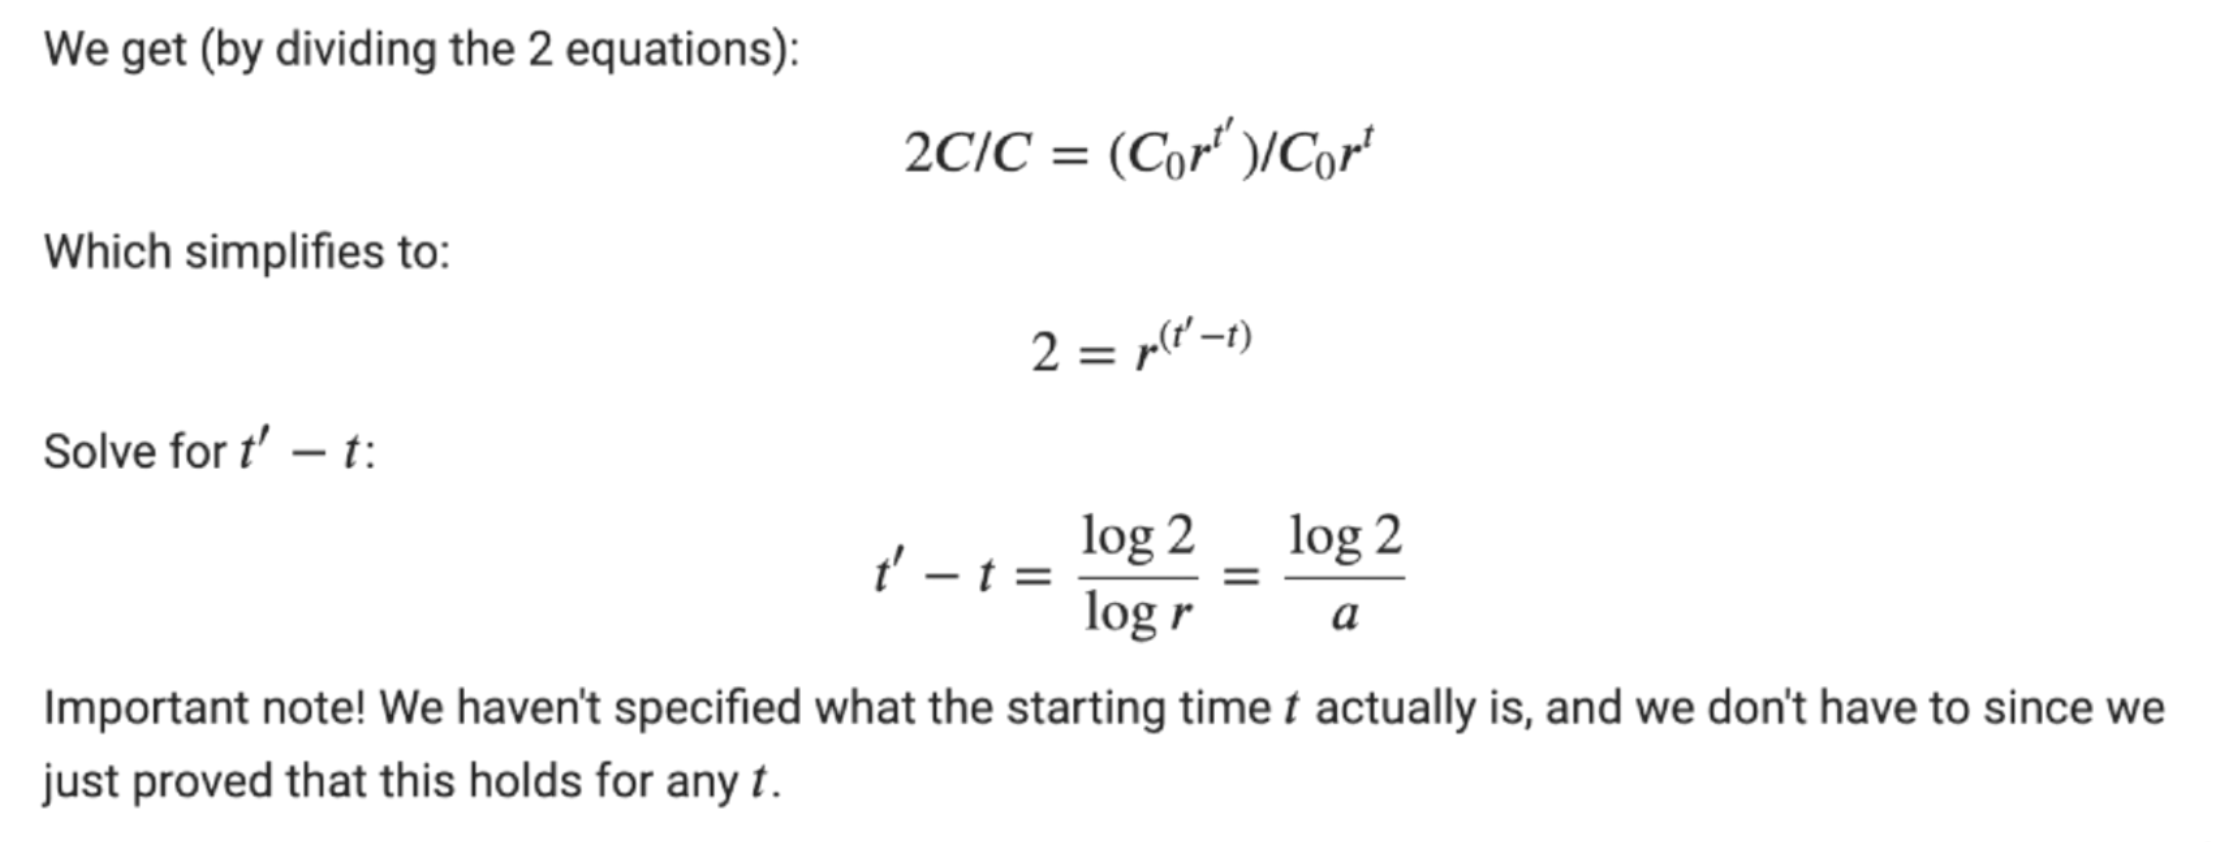

In [61]:
print("Time to double:", np.log(2) / (a))

Time to double: 2.0290594183560255


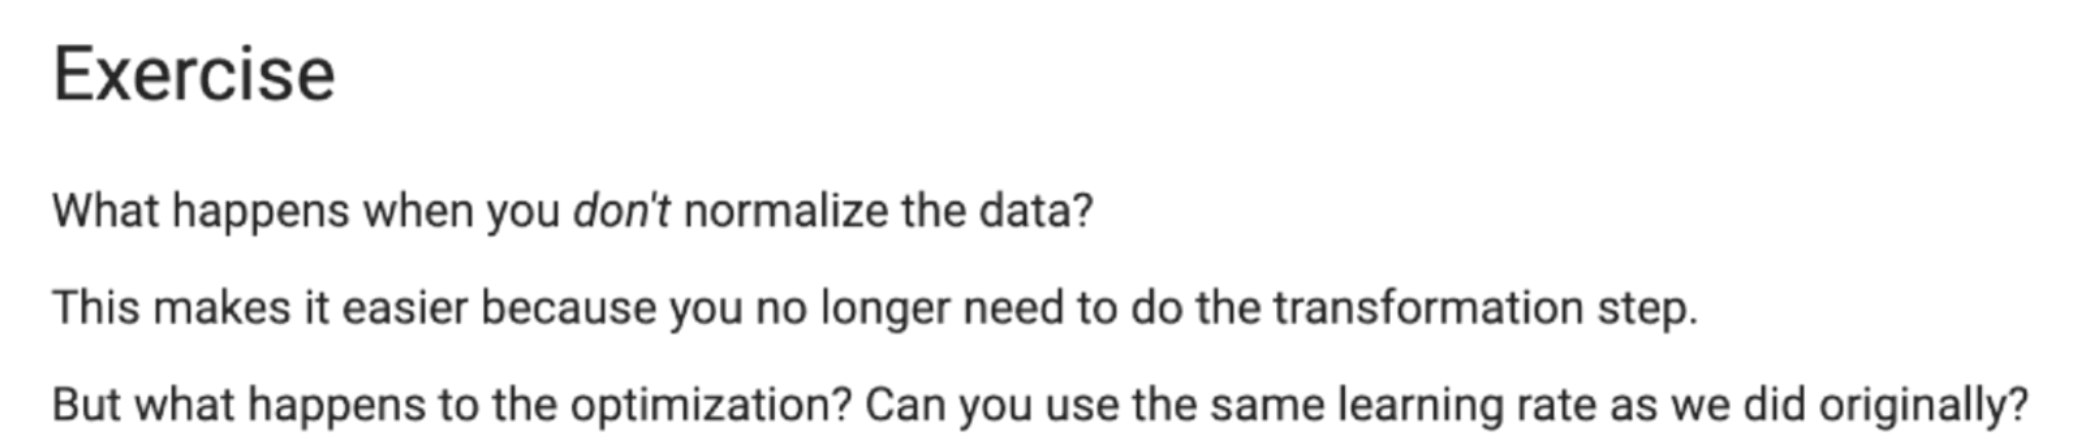